In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [20]:
df = pd.read_csv('dataset_Disney_clean_all.csv') 
df2 = pd.read_csv('../data/clean/waiting_times_interpolated.csv')


In [21]:
df_meta = pd.read_csv('../data/overview data/metadata.csv', sep = ';', usecols=['DATE', 'DAYOFWEEK', 'DAYOFYEAR', 'WEEKOFYEAR', 'MONTHOFYEAR', 'YEAR', 'SEASON'])

In [22]:
df_meta.head()

,DATE,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON
0,1/01/2015,5,0,0,1,2015,CHRISTMAS PEAK
1,1/02/2015,6,1,0,1,2015,CHRISTMAS
2,1/03/2015,7,2,0,1,2015,CHRISTMAS
3,1/04/2015,1,3,1,1,2015,CHRISTMAS
4,1/05/2015,2,4,1,1,2015,CHRISTMAS


In [23]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2079 entries, 0 to 2078
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   DATE         2079 non-null   object
 1   DAYOFWEEK    2079 non-null   int64 
 2   DAYOFYEAR    2079 non-null   int64 
 3   WEEKOFYEAR   2079 non-null   int64 
 4   MONTHOFYEAR  2079 non-null   int64 
 5   YEAR         2079 non-null   int64 
 6   SEASON       1826 non-null   object
dtypes: int64(5), object(2)
memory usage: 113.8+ KB


In [24]:
df.head()

,Unnamed: 0,date,attraction,minute,SACTMIN,SPOSTMIN
0,0,2015-01-01,7_dwarfs_train,0,0.0,0.0
1,1,2015-01-01,7_dwarfs_train,30,0.0,0.0
2,2,2015-01-01,7_dwarfs_train,60,0.0,0.0
3,3,2015-01-01,7_dwarfs_train,90,0.0,0.0
4,4,2015-01-01,7_dwarfs_train,120,0.0,0.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4264865 entries, 0 to 4264864
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   date        object 
 2   attraction  object 
 3   minute      int64  
 4   SACTMIN     float64
 5   SPOSTMIN    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 195.2+ MB


In [26]:
df2.head()

,Unnamed: 0,date,attraction,minute,SACTMIN,SPOSTMIN,SPOSTMIN_interp,actual_over_posted
0,0,2015-01-01,7_dwarfs_train,0,NaN,NaN,NaN,NaN
1,1,2015-01-01,7_dwarfs_train,30,NaN,NaN,NaN,NaN
2,2,2015-01-01,7_dwarfs_train,60,NaN,NaN,NaN,NaN
3,3,2015-01-01,7_dwarfs_train,90,NaN,NaN,NaN,NaN
4,4,2015-01-01,7_dwarfs_train,120,NaN,NaN,NaN,NaN


In [27]:
# Convert DATE column in df1 to datetime objects
df_meta['DATE'] = pd.to_datetime(df_meta['DATE'], format='%m/%d/%Y') #day/month/year format



In [28]:
df_meta.head()

,DATE,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON
0,2015-01-01,5,0,0,1,2015,CHRISTMAS PEAK
1,2015-01-02,6,1,0,1,2015,CHRISTMAS
2,2015-01-03,7,2,0,1,2015,CHRISTMAS
3,2015-01-04,1,3,1,1,2015,CHRISTMAS
4,2015-01-05,2,4,1,1,2015,CHRISTMAS


In [29]:
# Convert date column in df2 to datetime objects
df['date'] = pd.to_datetime(df['date']) #default format is year-month-day



In [30]:
df.head()

,Unnamed: 0,date,attraction,minute,SACTMIN,SPOSTMIN
0,0,2015-01-01,7_dwarfs_train,0,0.0,0.0
1,1,2015-01-01,7_dwarfs_train,30,0.0,0.0
2,2,2015-01-01,7_dwarfs_train,60,0.0,0.0
3,3,2015-01-01,7_dwarfs_train,90,0.0,0.0
4,4,2015-01-01,7_dwarfs_train,120,0.0,0.0


In [31]:
# Merge the DataFrames on the standardized date columns
merged_df = pd.merge(df_meta, df, left_on='DATE', right_on='date', how='inner')

In [32]:
merged_df.tail()

,DATE,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON,Unnamed: 0,date,attraction,minute,SACTMIN,SPOSTMIN
3769310,2021-08-31,3,242,35,8,2021,NaN,4026160,2021-08-31,winnie_the_pooh,1500,15.0,5.0
3769311,2021-08-31,3,242,35,8,2021,NaN,4026161,2021-08-31,winnie_the_pooh,1530,15.0,5.0
3769312,2021-08-31,3,242,35,8,2021,NaN,4026162,2021-08-31,winnie_the_pooh,1560,15.0,5.0
3769313,2021-08-31,3,242,35,8,2021,NaN,4026163,2021-08-31,winnie_the_pooh,1590,15.0,5.0
3769314,2021-08-31,3,242,35,8,2021,NaN,4026164,2021-08-31,winnie_the_pooh,1620,15.0,5.0


In [33]:
merged_df.to_csv('../data/clean/training_merged_metadata.csv', encoding='utf-8')

In [34]:
merged_df.isna().sum()

DATE                0
DAYOFWEEK           0
DAYOFYEAR           0
WEEKOFYEAR          0
MONTHOFYEAR         0
YEAR                0
SEASON         475585
Unnamed: 0          0
date                0
attraction          0
minute              0
SACTMIN             0
SPOSTMIN            0
dtype: int64

In [37]:
merged_noseason = merged_df.drop(columns=['SEASON', 'date', 'Unnamed: 0', 'SPOSTMIN'])

In [38]:
merged_noseason.isna().sum()

DATE           0
DAYOFWEEK      0
DAYOFYEAR      0
WEEKOFYEAR     0
MONTHOFYEAR    0
YEAR           0
attraction     0
minute         0
SACTMIN        0
dtype: int64

In [39]:
merged_noseason.describe()

,DATE,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,minute,SACTMIN
count,3769315,3.769315e+06,3.769315e+06,3.769315e+06,3.769315e+06,3.769315e+06,3.769315e+06,3.769315e+06
mean,2018-01-12 23:11:58.024892160,3.992106e+00,1.826588e+02,2.619586e+01,6.542133e+00,2.017533e+03,8.100000e+02,9.529811e+00
min,2015-01-01 00:00:00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.015000e+03,0.000000e+00,0.000000e+00
25%,2016-07-28 00:00:00,2.000000e+00,8.900000e+01,1.300000e+01,3.000000e+00,2.016000e+03,3.900000e+02,0.000000e+00
50%,2018-01-20 00:00:00,4.000000e+00,1.840000e+02,2.600000e+01,7.000000e+00,2.018000e+03,8.100000e+02,0.000000e+00
75%,2019-05-13 00:00:00,6.000000e+00,2.740000e+02,3.900000e+01,1.000000e+01,2.019000e+03,1.230000e+03,1.500000e+01
max,2021-08-31 00:00:00,7.000000e+00,3.650000e+02,5.300000e+01,1.200000e+01,2.021000e+03,1.620000e+03,3.300000e+02
std,NaN,2.004863e+00,1.064313e+02,1.521157e+01,3.478515e+00,1.727341e+00,4.762353e+02,1.797981e+01


<Axes: >

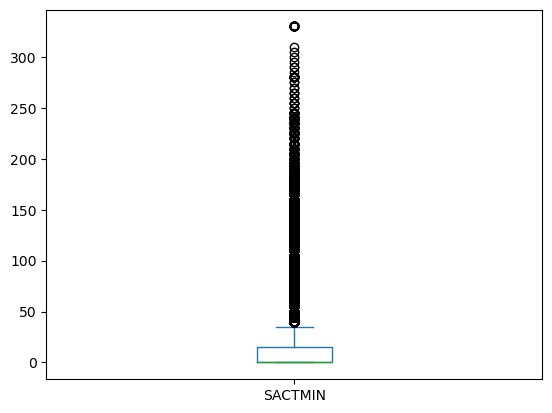

In [40]:
merged_noseason['SACTMIN'].plot(kind='box')

In [41]:
merged_noseason_copy = merged_noseason.copy()

In [42]:
#merged_noseason_copy['actual_over_posted'].replace([np.inf, -np.inf], np.nan, inplace=True)

In [43]:
merged_noseason_copy.head()

,DATE,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,attraction,minute,SACTMIN
0,2015-01-01,5,0,0,1,2015,7_dwarfs_train,0,0.0
1,2015-01-01,5,0,0,1,2015,7_dwarfs_train,30,0.0
2,2015-01-01,5,0,0,1,2015,7_dwarfs_train,60,0.0
3,2015-01-01,5,0,0,1,2015,7_dwarfs_train,90,0.0
4,2015-01-01,5,0,0,1,2015,7_dwarfs_train,120,0.0


In [44]:
merged_noseason_copy.describe()

,DATE,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,minute,SACTMIN
count,3769315,3.769315e+06,3.769315e+06,3.769315e+06,3.769315e+06,3.769315e+06,3.769315e+06,3.769315e+06
mean,2018-01-12 23:11:58.024892160,3.992106e+00,1.826588e+02,2.619586e+01,6.542133e+00,2.017533e+03,8.100000e+02,9.529811e+00
min,2015-01-01 00:00:00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.015000e+03,0.000000e+00,0.000000e+00
25%,2016-07-28 00:00:00,2.000000e+00,8.900000e+01,1.300000e+01,3.000000e+00,2.016000e+03,3.900000e+02,0.000000e+00
50%,2018-01-20 00:00:00,4.000000e+00,1.840000e+02,2.600000e+01,7.000000e+00,2.018000e+03,8.100000e+02,0.000000e+00
75%,2019-05-13 00:00:00,6.000000e+00,2.740000e+02,3.900000e+01,1.000000e+01,2.019000e+03,1.230000e+03,1.500000e+01
max,2021-08-31 00:00:00,7.000000e+00,3.650000e+02,5.300000e+01,1.200000e+01,2.021000e+03,1.620000e+03,3.300000e+02
std,NaN,2.004863e+00,1.064313e+02,1.521157e+01,3.478515e+00,1.727341e+00,4.762353e+02,1.797981e+01


In [45]:
df_7dwarfs = merged_noseason_copy[merged_noseason_copy['attraction'] == '7_dwarfs_train']

In [46]:
df_7dwarfs.head()

,DATE,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,attraction,minute,SACTMIN
0,2015-01-01,5,0,0,1,2015,7_dwarfs_train,0,0.0
1,2015-01-01,5,0,0,1,2015,7_dwarfs_train,30,0.0
2,2015-01-01,5,0,0,1,2015,7_dwarfs_train,60,0.0
3,2015-01-01,5,0,0,1,2015,7_dwarfs_train,90,0.0
4,2015-01-01,5,0,0,1,2015,7_dwarfs_train,120,0.0


In [47]:
df_7dwarfs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114180 entries, 0 to 3767444
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   DATE         114180 non-null  datetime64[ns]
 1   DAYOFWEEK    114180 non-null  int64         
 2   DAYOFYEAR    114180 non-null  int64         
 3   WEEKOFYEAR   114180 non-null  int64         
 4   MONTHOFYEAR  114180 non-null  int64         
 5   YEAR         114180 non-null  int64         
 6   attraction   114180 non-null  object        
 7   minute       114180 non-null  int64         
 8   SACTMIN      114180 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(6), object(1)
memory usage: 8.7+ MB


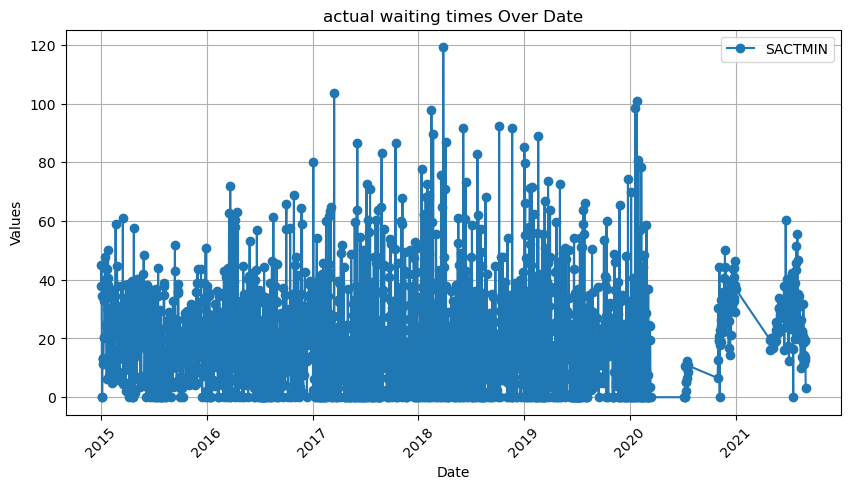

In [49]:

# Group by date and aggregate (e.g., mean, sum, etc.)
grouped_df = df_7dwarfs.groupby('DATE')[['SACTMIN']].mean()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(grouped_df.index, grouped_df['SACTMIN'], label='SACTMIN', marker='o')


# Formatting
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('actual waiting times Over Date')
plt.legend()
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.grid(True)

plt.show()

In [50]:
df_7dwarfs_no_covid = df_7dwarfs[df_7dwarfs['DATE'].dt.year != 2020]

In [51]:
df_7dwarfs_no_covid.head()

,DATE,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,attraction,minute,SACTMIN
0,2015-01-01,5,0,0,1,2015,7_dwarfs_train,0,0.0
1,2015-01-01,5,0,0,1,2015,7_dwarfs_train,30,0.0
2,2015-01-01,5,0,0,1,2015,7_dwarfs_train,60,0.0
3,2015-01-01,5,0,0,1,2015,7_dwarfs_train,90,0.0
4,2015-01-01,5,0,0,1,2015,7_dwarfs_train,120,0.0


In [52]:
df_7dwarfs_no_covid.describe()

,DATE,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,minute,SACTMIN
count,106040,106040.000000,106040.000000,106040.000000,106040.000000,106040.000000,106040.000000,106040.000000
mean,2017-09-18 12:41:04.730290432,3.995332,182.287863,26.164938,6.529564,2017.215249,810.000000,20.521124
min,2015-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,2015.000000,0.000000,0.000000
25%,2016-04-26 18:00:00,2.000000,96.000000,14.000000,4.000000,2016.000000,390.000000,0.000000
50%,2017-08-21 12:00:00,4.000000,183.000000,26.000000,7.000000,2017.000000,810.000000,0.000000
75%,2018-12-18 06:00:00,6.000000,268.000000,38.000000,9.000000,2018.000000,1230.000000,35.000000
max,2021-08-31 00:00:00,7.000000,365.000000,53.000000,12.000000,2021.000000,1620.000000,215.000000
std,NaN,2.001430,102.955762,14.713542,3.366953,1.646340,476.237482,27.913726


In [53]:

X = df_7dwarfs_no_covid.drop(columns=['SACTMIN', 'attraction', 'DATE'])  # Features
y = df_7dwarfs_no_covid['SACTMIN']  # Target variable (numeric)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [54]:
X


,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,minute
0,5,0,0,1,2015,0
1,5,0,0,1,2015,30
2,5,0,0,1,2015,60
3,5,0,0,1,2015,90
4,5,0,0,1,2015,120
...,...,...,...,...,...,...
3767440,3,242,35,8,2021,1500
3767441,3,242,35,8,2021,1530
3767442,3,242,35,8,2021,1560
3767443,3,242,35,8,2021,1590


In [55]:
model = RandomForestRegressor(n_estimators=50, max_samples=0.5, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(max_samples=0.5, n_estimators=50, n_jobs=-1,
                      random_state=42)

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  # Root Mean Squared Error

print(f'MAE: {mae:.4f}')
print(f'RMSE: {rmse:.4f}')

MAE: 2.6326
RMSE: 6.4366


mean is 20, met sdtev 27.9. De voorspelde waarde van het gemiddelde heeft een betere error dan de waarnemingen.

In [57]:
model2 = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model2.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [58]:
y_pred = model2.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  # Root Mean Squared Error

print(f'MAE: {mae:.4f}')
print(f'RMSE: {rmse:.4f}')

MAE: 1.7910
RMSE: 5.6723


In [59]:
model3 = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
model3.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

In [60]:
y_pred = model3.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  # Root Mean Squared Error

print(f'MAE: {mae:.4f}')
print(f'RMSE: {rmse:.4f}')

MAE: 1.7861
RMSE: 5.6520


In [ ]:
print((y_test - y_pred).sum()) #should be nonzero

-1441.95


In [79]:
print((y_test == y_pred).all())

False


In [73]:
# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R² Score

# Print results
print(f'MAE: {mae:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

feature_names = X.columns
# Feature Importance (for models like RandomForest, GradientBoosting, etc.)
if hasattr(model3, "feature_importances_"):
    import pandas as pd
    feature_importance = pd.Series(model.feature_importances_, index=feature_names).sort_values(ascending=False)
    print("\nFeature Importance:")
    print(feature_importance)

MAE: 1.7861
RMSE: 5.6520
R²: 0.9589

Feature Importance:
minute         0.358277
DAYOFYEAR      0.342175
YEAR           0.120663
DAYOFWEEK      0.085057
WEEKOFYEAR     0.081547
MONTHOFYEAR    0.012280
dtype: float64


Conclusie: het verschil tussen 100 of 200 random trees is klein. Heeft geen zin om het bos nog groter te maken.

In [61]:
#df = pd.read_csv("your_data.csv")

# Assume you have a trained model
feature_columns = ['DAYOFWEEK', 'DAYOFYEAR', 'WEEKOFYEAR', 'MONTHOFYEAR', 'YEAR', 'minute']  # Replace with actual feature names
df_7dwarfs_no_covid['SACTMIN'] = model3.predict(df_7dwarfs_no_covid[feature_columns])

# Save updated DataFrame (optional)
df_7dwarfs_no_covid.to_csv("with_predicted_waiting_times_2.csv", index=False)


C:\Users\isabe\AppData\Local\Temp\ipykernel_25436\2789766122.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_7dwarfs_no_covid['SACTMIN'] = model3.predict(df_7dwarfs_no_covid[feature_columns])


In [83]:
# Make sure you have a trained model
y_pred = model3.predict(X[feature_columns])  # Generate predictions

# Create a new DataFrame for saving results
df_results = X.copy()  # Copy original features (if needed)
df_results['SACTMIN_PREDICTED'] = y_pred  # Store predictions separately

# Save the new DataFrame (optional)
df_results.to_csv("with_predicted_waiting_times_2.csv", index=False)

In [82]:
print((df_7dwarfs_no_covid['SACTMIN'] == model3.predict(df_7dwarfs_no_covid[feature_columns])).all())

True


In [63]:
df_7dwarfs_no_covid['SACTMIN'].mean()


20.54190116937005

In [64]:
df_7dwarfs_no_covid['SACTMIN'].std()

27.27533154318265

conclusie?

In [84]:
df_predicted = pd.read_csv('with_predicted_waiting_times_2.csv')

In [86]:
df_predicted.head(20)

,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,minute,SACTMIN_PREDICTED
0,5,0,0,1,2015,0,0.000
1,5,0,0,1,2015,30,0.000
2,5,0,0,1,2015,60,0.000
3,5,0,0,1,2015,90,0.000
4,5,0,0,1,2015,120,0.000
5,5,0,0,1,2015,150,0.000
6,5,0,0,1,2015,180,0.000
7,5,0,0,1,2015,210,0.000
8,5,0,0,1,2015,240,0.000
9,5,0,0,1,2015,270,0.000


# het kan gewoonweg niet dat SACTMIN van de voorspelling krek hetzelfde is als van de oorspronkelijke data! WAAR ZIT DE FOUT???

In [87]:
df_7dwarfs_no_covid.head(20)

,DATE,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,attraction,minute,SACTMIN
0,2015-01-01,5,0,0,1,2015,7_dwarfs_train,0,0.000
1,2015-01-01,5,0,0,1,2015,7_dwarfs_train,30,0.000
2,2015-01-01,5,0,0,1,2015,7_dwarfs_train,60,0.000
3,2015-01-01,5,0,0,1,2015,7_dwarfs_train,90,0.000
4,2015-01-01,5,0,0,1,2015,7_dwarfs_train,120,0.000
5,2015-01-01,5,0,0,1,2015,7_dwarfs_train,150,0.000
6,2015-01-01,5,0,0,1,2015,7_dwarfs_train,180,0.000
7,2015-01-01,5,0,0,1,2015,7_dwarfs_train,210,0.000
8,2015-01-01,5,0,0,1,2015,7_dwarfs_train,240,0.000
9,2015-01-01,5,0,0,1,2015,7_dwarfs_train,270,0.000
